In [37]:

batters = read.csv('data/nc_batters.csv', stringsAsFactors=FALSE)

In [38]:
batters_org = batters


In [39]:
str(batters)

'data.frame':	32 obs. of  39 variables:
 $ X2루타       : num  25 16 4 6 37 22 27 15 4 20 ...
 $ X3루타       : num  0 0 1 0 2 3 5 0 0 7 ...
 $ 경기         : num  121 123 104 56 130 132 126 123 32 136 ...
 $ 경력         : chr  "가동초-잠신중-경기고-NC-경찰" "동천초-경주중-경주고-경남대-NC-상무" "광주서림초-충장중-진흥고" "양정초-경남중-경남고" ...
 $ 고의4구      : num  0 0 0 0 2 3 2 2 0 3 ...
 $ 대타타율     : num  0.375 0.316 0.059 0.167 1 0.125 0.6 0.533 0.111 0 ...
 $ 도루         : num  9 3 12 3 3 0 13 0 1 22 ...
 $ 도루성공률   : num  90 100 70.6 75 75 0 68.4 0 100 88 ...
 $ 도루실패     : num  1 0 5 1 1 4 6 1 0 3 ...
 $ 득점         : num  53 67 32 10 115 70 82 58 4 90 ...
 $ 득점권타울   : num  0.348 0.286 0.297 0.316 0.338 0.351 0.388 0.327 0.231 0.333 ...
 $ 등번호       : int  49 36 31 5 47 52 2 18 13 23 ...
 $ 루타         : num  183 142 73 25 313 205 222 166 11 261 ...
 $ 멀티히트     : num  32 19 9 2 53 34 47 20 1 38 ...
 $ 병살타       : num  11 6 0 0 6 8 12 11 2 10 ...
 $ 볼넷         : num  20 58 17 4 49 49 36 75 2 46 ...
 $ 사구         : num  9 11 4 1 9 5 1

연봉을 숫자로 변환

In [40]:
grep("달러", "50000달러")
grep("만원", "50000달러")
grep("달러", "5000만원")
grep("만원", "5000만원")

[1] 1

integer(0)

integer(0)

[1] 1

In [41]:
nchar('안녕하세요^^')

[1] 7

In [42]:
parseCurrency = function(item) {
    if (length(grep('달러', item))) {
        item = as.numeric(substr(item, 1, nchar(item)-2)) * 1130
    } else if (length(grep('만원', item))) {
        item = as.numeric(substr(item, 1, nchar(item)-2)) * 10000
    } else {
        item = as.numeric(item)
    }
    return(item)
}

In [43]:
batters$연봉 = sapply(batters$연봉, parseCurrency)

str(batters$연봉)

 num [1:32] 3.80e+07 1.35e+08 1.20e+08 5.80e+07 5.00e+08 1.40e+08 5.20e+08 7.00e+08 2.70e+07 9.04e+08 ...


나이를 숫자로 변환

In [44]:
2020 - as.numeric(substr("1993년 02월 12일", 1, 4))

[1] 27

In [45]:
parseAge = function(item) {
    return(2020 - as.numeric(substr(item, 1, 4)))
}

In [46]:
batters$나이 = sapply(batters$생년월일, parseAge)
table(batters$나이)


20 23 27 29 30 31 33 35 36 
 1  4  8  2  2  8  4  2  1 

신장과 체중을 분리하고 숫자로 변환

In [47]:
weight = strsplit("189cm/75kg", "/")[[1]][[1]]
height = strsplit("189cm/75kg", "/")[[1]][[2]]

as.numeric(substr(weight, 1, nchar(weight)-2))
as.numeric(substr(height, 1, nchar(height)-2))

[1] 189

[1] 75

In [48]:
parseHeight = function(item) {
    height = strsplit(item, "/")[[1]][[1]]
    return(as.numeric(substr(height, 1, nchar(height)-2)))
}
parseWeight = function(item) {
    weight = strsplit(item, "/")[[1]][[2]]
    return(as.numeric(substr(weight, 1, nchar(weight)-2)))
}

In [49]:
batters$신장 = sapply(batters$신장.체중, parseHeight)
batters$체중 = sapply(batters$신장.체중, parseWeight)

In [50]:
str(batters$신장)
str(batters$체중)

 num [1:32] 180 177 181 182 183 184 185 178 181 196 ...
 num [1:32] 81 85 83 80 100 80 80 88 75 97 ...


변수 설정

In [51]:
batters$안타.타수 = batters$안타 / batters$타수
batters$홈런.타수 = batters$홈런 / batters$타수

drops = c('타석', '등번호')
batters = batters[, !(names(batters) %in% drops)]


non-numeric 데이터 제거, normalization, nan 제거

In [52]:
normalize = function(x) {
    (x - min(x)) / (max(x) - min(x))
}

batters[, sapply(batters, is.numeric)] = lapply(batters[, sapply(batters, is.numeric)], normalize)

batters = batters[, sapply(batters, is.numeric)]

batters = batters[!sapply(batters, function(x) { all(is.nan(x)) })]

str(batters)

'data.frame':	32 obs. of  33 variables:
 $ X2루타       : num  0.6667 0.4167 0.0833 0.1389 1 ...
 $ X3루타       : num  0 0 0.143 0 0.286 ...
 $ 경기         : num  0.865 0.883 0.712 0.279 0.946 ...
 $ 고의4구      : num  0 0 0 0 0.286 ...
 $ 대타타율     : num  0.375 0.316 0.059 0.167 1 0.125 0.6 0.533 0.111 0 ...
 $ 도루         : num  0.409 0.136 0.545 0.136 0.136 ...
 $ 도루성공률   : num  0.9 1 0.706 0.75 0.75 0 0.684 0 1 0.88 ...
 $ 도루실패     : num  0.143 0 0.714 0.143 0.143 ...
 $ 득점         : num  0.4414 0.5676 0.2523 0.0541 1 ...
 $ 득점권타울   : num  0.347 0.187 0.215 0.264 0.321 ...
 $ 루타         : num  0.5779 0.4448 0.2208 0.0649 1 ...
 $ 멀티히트     : num  0.6038 0.3585 0.1698 0.0377 1 ...
 $ 병살타       : num  0.917 0.5 0 0 0.5 ...
 $ 볼넷         : num  0.2568 0.7703 0.2162 0.0405 0.6486 ...
 $ 사구         : num  0.6 0.7333 0.2667 0.0667 0.6 ...
 $ 삼진         : num  0.3041 0.4797 0.2635 0.0676 0.9932 ...
 $ 실책         : num  0.286 0.143 0 0.714 0 ...
 $ 안타         : num  0.7108 0.5181 0.2349 0.0904 1 ..

## 상관관계 분석

In [53]:

#library(reshape2)

In [54]:
#install.packages("reshape2")

In [55]:
library(reshape2)

In [70]:
CM = cor(batters)
CM[lower.tri(CM, diag = TRUE)] = NA
subset(melt(CM, na.rm = TRUE), value >= .70)
subset(melt(CM, na.rm = TRUE), value <= -.70)

,Var1,Var2,value
67,X2루타,경기,0.7923937
167,X3루타,도루,0.7071550
265,X2루타,득점,0.9220571
267,경기,득점,0.8876075
331,X2루타,루타,0.9519577
333,경기,루타,0.8658514
339,득점,루타,0.9689866
364,X2루타,멀티히트,0.9550283
366,경기,멀티히트,0.8392826
372,득점,멀티히트,0.9572216


Var1,Var2,value


## 다중회귀분석

In [57]:
salary_model = lm(연봉 ~ ., data=batters)
summary(salary_model)


Call:
lm(formula = 연봉 ~ ., data = batters)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.151e-15 -2.841e-16  0.000e+00  2.841e-16  1.151e-15 

Coefficients: (16 not defined because of singularities)
                Estimate Std. Error    t value Pr(>|t|)    
(Intercept)    3.966e+00  1.729e-14  2.294e+14   <2e-16 ***
X2루타        -8.044e+00  3.575e-14 -2.250e+14   <2e-16 ***
X3루타        -6.895e-01  1.476e-15 -4.672e+14   <2e-16 ***
경기           2.668e+00  1.189e-14  2.244e+14   <2e-16 ***
고의4구        7.804e-01  3.859e-15  2.023e+14   <2e-16 ***
대타타율      -1.828e-01  2.139e-15 -8.548e+13   <2e-16 ***
도루           1.612e+00  3.695e-15  4.362e+14   <2e-16 ***
도루성공률    -3.869e+00  1.659e-14 -2.332e+14   <2e-16 ***
도루실패      -5.731e+00  2.386e-14 -2.402e+14   <2e-16 ***
득점           4.036e+00  1.858e-14  2.172e+14   <2e-16 ***
득점권타울    -5.163e-01  1.407e-15 -3.670e+14   <2e-16 ***
루타          -1.177e+01  4.466e-14 -2.635e+14   <2e-16 ***
멀티히트       1.429e+01  5.774e

데이터가 적어서 결과가 잘 나오지 않는다

## PCA 분석

In [58]:
batters_pca = prcomp(batters[,!(names(batters) == c('연봉'))], center=TRUE, scale=TRUE)

summary(batters_pca)

Importance of components:
                         PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.943 2.1489 1.66119 1.51690 1.22882 1.19695 1.03012
Proportion of Variance 0.486 0.1443 0.08624 0.07191 0.04719 0.04477 0.03316
Cumulative Proportion  0.486 0.6303 0.71652 0.78842 0.83561 0.88038 0.91354
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.91513 0.82429 0.6171 0.49272 0.47425 0.42184 0.35456
Proportion of Variance 0.02617 0.02123 0.0119 0.00759 0.00703 0.00556 0.00393
Cumulative Proportion  0.93971 0.96095 0.9728 0.98043 0.98746 0.99302 0.99695
                          PC15    PC16      PC17      PC18      PC19      PC20
Standard deviation     0.27036 0.15648 3.472e-16 3.472e-16 3.472e-16 3.472e-16
Proportion of Variance 0.00228 0.00077 0.000e+00 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  0.99923 1.00000 1.000e+00 1.000e+00 1.000e+00 1.000e+00
                            PC21      PC22

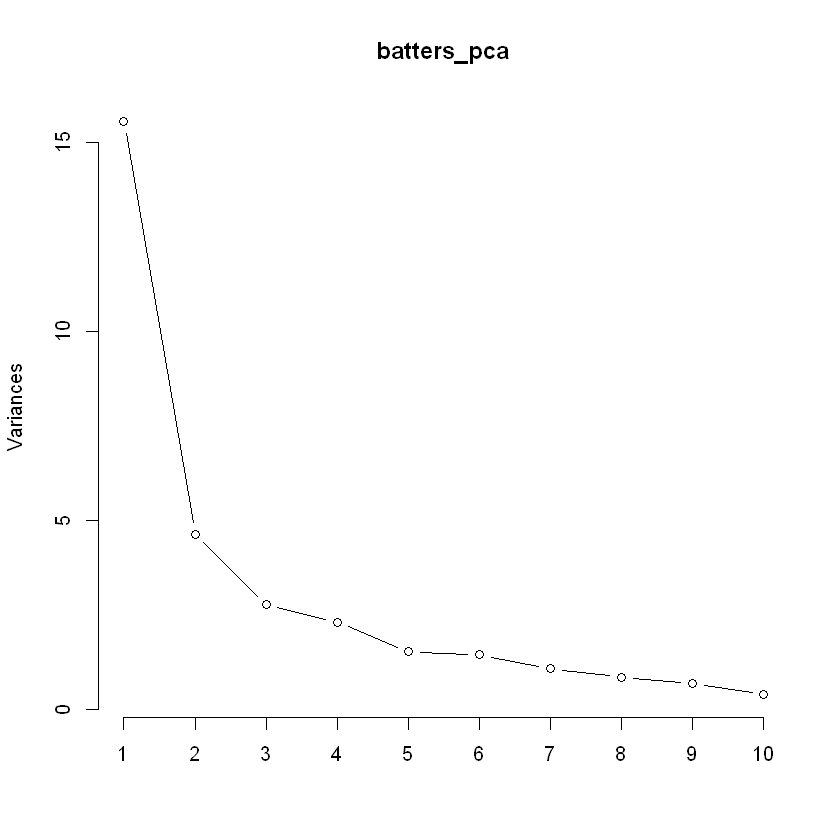

In [59]:
plot(batters_pca, type = "l")

각 Principal Component에 따른 데이터의 분산을 그려보았다(분산이 클수록 해당 주성분이 데이터의 분포를 많이 설명한다는 뜻이다).

In [71]:
batters_pca$rotation[, 1:2]

,PC1,PC2
X2루타,-0.230758619,0.018545885
X3루타,-0.150289080,0.122263206
경기,-0.215563430,0.193817894
고의4구,-0.176866626,-0.009891932
대타타율,-0.077886494,-0.283016835
도루,-0.093133330,0.140648658
도루성공률,0.077904545,-0.013518026
도루실패,-0.070426562,0.174136793
득점,-0.241270733,0.077701696
득점권타울,-0.082431049,-0.351589837


In [27]:
install.packages("devtools")

also installing the dependencies 'utf8', 'sys', 'BH', 'pillar', 'pkgconfig', 'vctrs', 'askpass', 'credentials', 'zip', 'gitcreds', 'ini', 'lazyeval', 'later', 'highr', 'markdown', 'xfun', 'diffobj', 'rematch2', 'tibble', 'clipr', 'curl', 'fs', 'gert', 'gh', 'lifecycle', 'purrr', 'rappdirs', 'rprojroot', 'whisker', 'yaml', 'processx', 'R6', 'assertthat', 'fansi', 'rex', 'htmlwidgets', 'crosstalk', 'promises', 'mime', 'openssl', 'prettyunits', 'xopen', 'brew', 'commonmark', 'knitr', 'xml2', 'brio', 'praise', 'ps', 'waldo', 'usethis', 'callr', 'cli', 'covr', 'desc', 'DT', 'ellipsis', 'httr', 'jsonlite', 'memoise', 'pkgbuild', 'pkgload', 'rcmdcheck', 'remotes', 'rlang', 'roxygen2', 'rstudioapi', 'rversions', 'sessioninfo', 'testthat', 'withr'



package 'utf8' successfully unpacked and MD5 sums checked
package 'sys' successfully unpacked and MD5 sums checked
package 'BH' successfully unpacked and MD5 sums checked
package 'pillar' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'askpass' successfully unpacked and MD5 sums checked
package 'credentials' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'gitcreds' successfully unpacked and MD5 sums checked
package 'ini' successfully unpacked and MD5 sums checked
package 'lazyeval' successfully unpacked and MD5 sums checked
package 'later' successfully unpacked and MD5 sums checked
package 'highr' successfully unpacked and MD5 sums checked
package 'markdown' successfully unpacked and MD5 sums checked
package 'xfun' successfully unpacked and MD5 sums checked
package 'diffobj' successfully unpacked and M

Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\user\anaconda3\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll를 C:\Users\user\anaconda3\Lib\R\library\jsonlite\libs\x64\jsonlite.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'jsonlite'"

package 'memoise' successfully unpacked and MD5 sums checked
package 'pkgbuild' successfully unpacked and MD5 sums checked
package 'pkgload' successfully unpacked and MD5 sums checked
package 'rcmdcheck' successfully unpacked and MD5 sums checked
package 'remotes' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'roxygen2' successfully unpacked and MD5 sums checked
package 'rstudioapi' successfully unpacked and MD5 sums checked
package 'rversions' successfully unpacked and MD5 sums checked
package 'sessioninfo' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked and MD5 sums checked
package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpekTpzm\downloaded_packages


In [60]:
library(devtools)

Warning message:
"package 'devtools' was built under R version 3.6.3"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.3"Error: package or namespace load failed for 'usethis' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'glue'


ERROR: Error: package 'usethis' could not be loaded


In [30]:
install_github("vqv/ggbiplot")


Please download and install Rtools 3.5 from https://cran.r-project.org/bin/windows/Rtools/.


digest       (NA    -> 0.6.27 ) [CRAN]
viridisLite  (NA    -> 0.3.0  ) [CRAN]
RColorBrewer (NA    -> 1.1-2  ) [CRAN]
munsell      (NA    -> 0.5.0  ) [CRAN]
labeling     (NA    -> 0.4.2  ) [CRAN]
farver       (NA    -> 2.0.3  ) [CRAN]
lattice      (NA    -> 0.20-41) [CRAN]
Matrix       (NA    -> 1.2-18 ) [CRAN]
nlme         (NA    -> 3.1-151) [CRAN]
jsonlite     (1.6   -> 1.7.2  ) [CRAN]
evaluate     (0.13  -> 0.14   ) [CRAN]
Rcpp         (1.0.1 -> 1.0.5  ) [CRAN]
scales       (NA    -> 1.1.1  ) [CRAN]
mgcv         (NA    -> 1.8-33 ) [CRAN]
MASS         (NA    -> 7.3-53 ) [CRAN]
isoband      (NA    -> 0.2.3  ) [CRAN]
gtable       (NA    -> 0.3.0  ) [CRAN]
ggplot2      (NA    -> 3.3.2  ) [CRAN]


Installing 18 packages: digest, viridisLite, RColorBrewer, munsell, labeling, farver, lattice, Matrix, nlme, jsonlite, evaluate, Rcpp, scales, mgcv, MASS, isoband, gtable, ggplot2


package 'digest' successfully unpacked and MD5 sums checked


ERROR: Error: Failed to install 'ggbiplot' from GitHub:
  (converted from warning) cannot remove prior installation of package 'digest'


## PCA + 다중회귀분석

In [64]:
batters2d = data.frame(predict(batters_pca, batters)[, 1:2])
batters2d$salary = batters$연봉
str(batters2d)

'data.frame':	32 obs. of  3 variables:
 $ PC1   : num  -1.264 -0.524 2.345 4.12 -5.579 ...
 $ PC2   : num  -0.437 0.682 1.916 -1.397 -0.736 ...
 $ salary: num  0.00558 0.05474 0.04714 0.01571 0.23974 ...


In [65]:
salary2d = lm(salary ~ ., data=batters2d)
summary(salary2d)


Call:
lm(formula = salary ~ ., data = batters2d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21502 -0.12684 -0.01805  0.05729  0.60890 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1655791  0.0349252   4.741 5.21e-05 ***
PC1         -0.0433379  0.0089981  -4.816 4.23e-05 ***
PC2         -0.0005681  0.0165123  -0.034    0.973    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1976 on 29 degrees of freedom
Multiple R-squared:  0.4444,	Adjusted R-squared:  0.4061 
F-statistic:  11.6 on 2 and 29 DF,  p-value: 0.000199


아까의 선형결합 식에 다중회귀의 계수를 곱해 대략적인 의미파악

In [66]:
salary_factors = salary2d$coefficients['PC1'][[1]] * batters_pca$rotation[,1]
salary_factors = salary_factors + salary2d$coefficients['PC2'][[1]] * batters_pca$rotation[,2]
sort(salary_factors, decreasing=TRUE)

루타          안타          타점          타수          득점 
 0.0107378478  0.0104946927  0.0104452012  0.0104178041  0.0104120118 
     멀티히트        X2루타          홈런          사구          경기 
 0.0103364302  0.0099900463  0.0093861656  0.0092792802  0.0092319458 
       병살타          볼넷          삼진     홈런.타수        장타율 
 0.0091404500  0.0088719681  0.0087244276  0.0086759388  0.0086145266 
출루율.장타율       고의4구          체중    희생플라이        X3루타 
 0.0079670811  0.0076706391  0.0074608472  0.0071110448  0.0064437467 
       출루율          타율     안타.타수          나이          도루 
 0.0060461682  0.0056601003  0.0056495803  0.0050205820  0.0039562945 
   득점권타울      대타타율          신장      도루실패          실책 
 0.0037721260  0.0035362178  0.0032836526  0.0029532070  0.0019774126 
     희생번트    도루성공률 
-0.0003808777 -0.0033685358